In [2]:
%matplotlib widget
%matplotlib inline
import sys
from sys import platform
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import seaborn as sns
import scipy.signal as signal
from IPython.display import display, Math
from tqdm import tqdm

from astropy.io import fits, ascii
from astropy.table import Table
from astropy.modeling import functional_models, fitting
from astropy.timeseries import LombScargle

sns.set_context('talk')
# sns.set_style("whitegrid")
sns.set_palette("colorblind")

root_dir = '/Volumes/Samsung_1TB/AstroData/Circinus_ULX5/'


# NuSTAR

Text(0.5, 0, 'Energy (keV)')

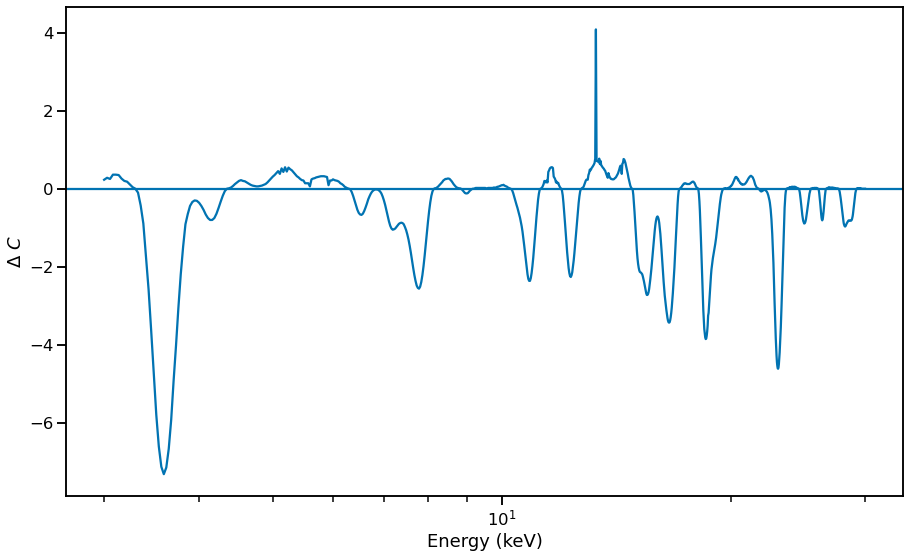

In [8]:
infile = root_dir + 'nustar/simultaneous_highstate/tbabs_simpl_diskbb_gauss_cstat.csv'
data = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
plt.figure(figsize=(15,9))
plt.plot(data['Energy'], data['cstat_new']-data['cstat0'])
plt.axhline(0.0)
plt.xscale('log')
plt.ylabel(r'$\Delta\ C$')
plt.xlabel('Energy (keV)')

# peaks, _ = signal.find_peaks(data['cstat0'] - data['cstat_new'], threshold=0.13)
# print(data['Energy'][peaks])
# plt.plot(data['Energy'][peaks], (data['cstat_new']-data['cstat0'])[peaks], "x", markersize=20)

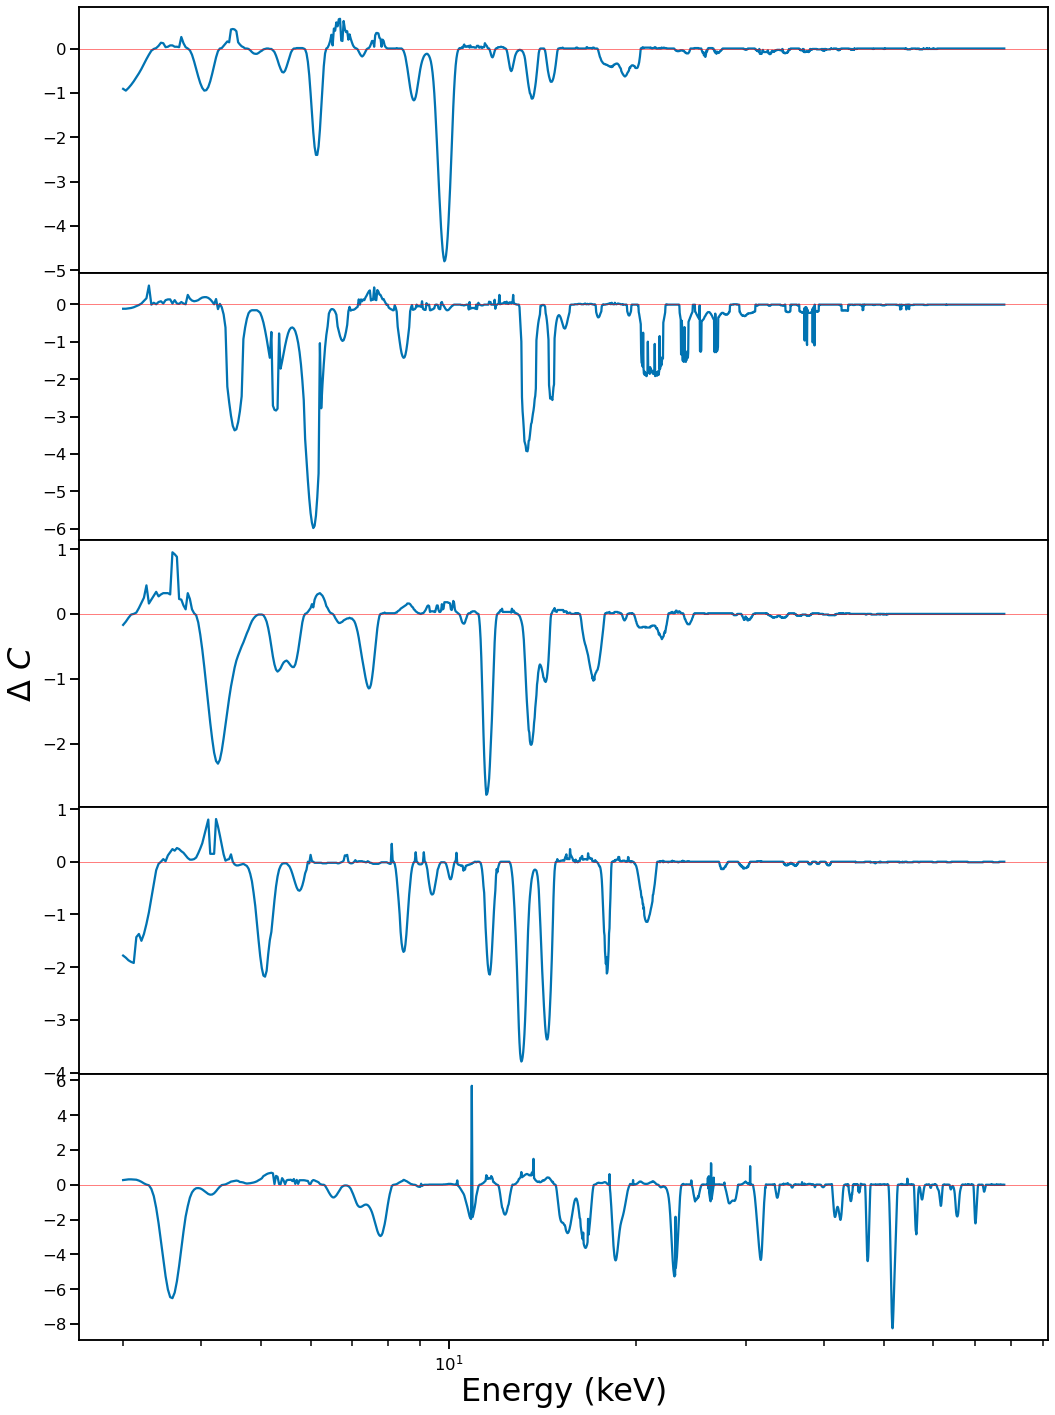

In [13]:
infile = root_dir + 'nustar/simultaneous_highstate/tbfeo_simpl_diskbb_gauss_cstat.csv'
data_sim = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'nustar/nustar_30002038002/30002038002_products/tbfeo_simpl_diskbb_gabs_cstat.csv'
data_002 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'nustar/nustar_30002038004/30002038004_products/tbfeo_simpl_diskbb_gabs_cstat.csv'
data_004 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'nustar/nustar_30002038006/30002038006_products/tbfeo_simpl_diskbb_gabs_cstat.csv'
data_006 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'nustar/nustar_80601502001/80601502001_products/tbfeo_simpl_diskbb_gabs_cstat.csv'
data_806 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1, sharex=True,  gridspec_kw = {'height_ratios':[1, 1,1,1,1], 'hspace':0}, figsize=(15, 20))

ax1.plot(data_002['Energy'], data_002['cstat_new']-data_002['cstat0'])
ax1.axhline(0.0, color='red', lw=0.5)

ax2.plot(data_004['Energy'], data_004['cstat_new']-data_004['cstat0'])
ax2.axhline(0.0, color='red', lw=0.5)

ax3.plot(data_006['Energy'], data_006['cstat_new']-data_006['cstat0'])
ax3.axhline(0.0, color='red', lw=0.5)

ax4.plot(data_806['Energy'], data_806['cstat_new']-data_806['cstat0'])
ax4.axhline(0.0, color='red', lw=0.5)

ax5.plot(data_sim['Energy'], data_sim['cstat_new']-data_sim['cstat0'])
ax5.axhline(0.0, color='red', lw=0.5)

plt.xscale('log')
ax3.set_ylabel(r'$\Delta\ C$', fontsize=32)
ax5.set_xlabel('Energy (keV)', fontsize=32)

plt.tight_layout()
plt.savefig(root_dir + 'figures/NuSTAR_abs_scan.pdf')

# peaks, _ = signal.find_peaks(data['cstat0'] - data['cstat_new'], threshold=0.13)
# print(data['Energy'][peaks])
# plt.plot(data['Energy'][peaks], (data['cstat_new']-data['cstat0'])[peaks], "x", markersize=20)

# XMM

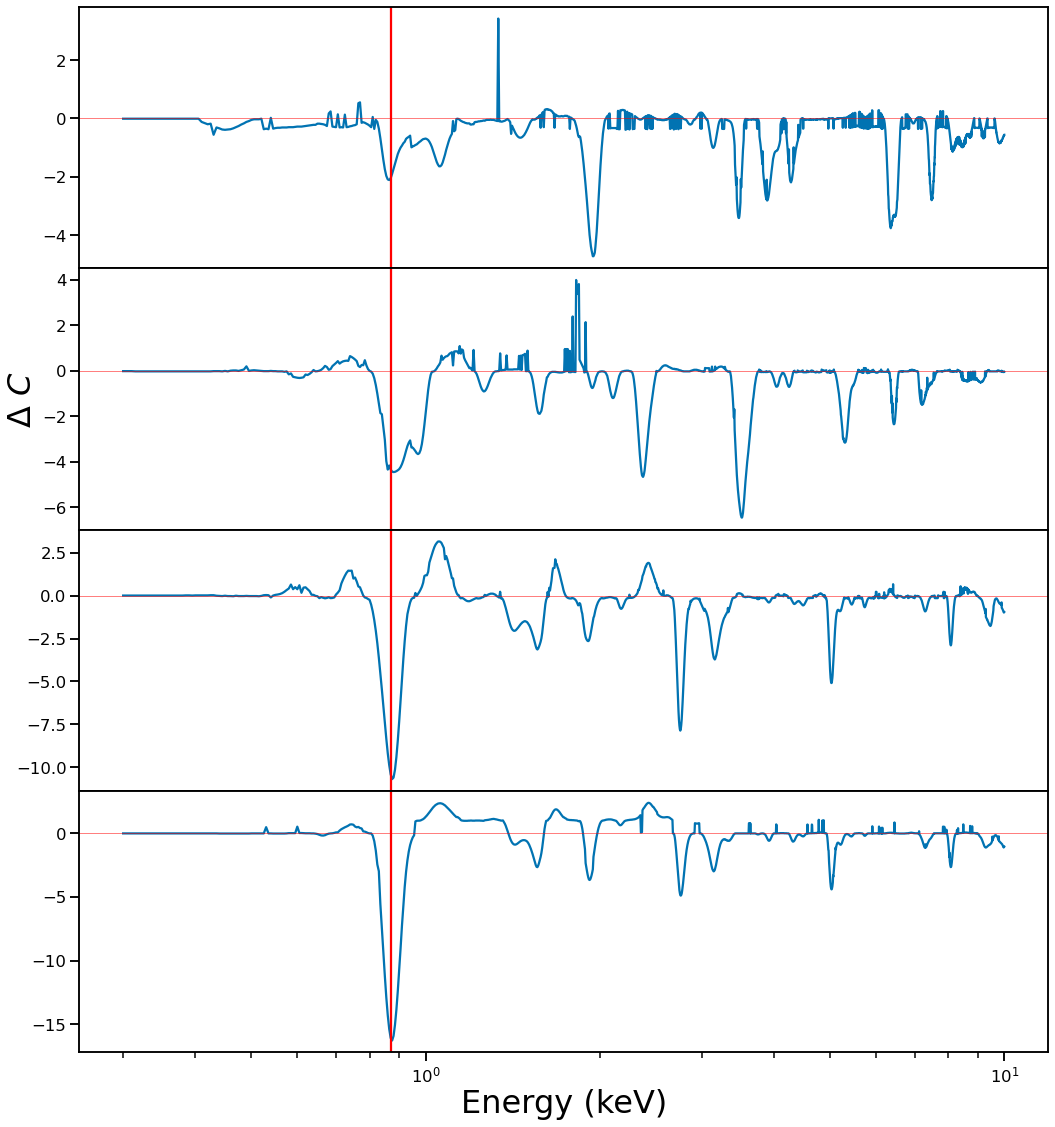

In [40]:
infile = root_dir + 'xmm/0780950201/products/tbfeo_diskbb_simpl_diskbb_gabs_cstat.csv'
data_078 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'xmm/0792382701/products/tbfeo_diskbb_simpl_diskbb_gabs_cstat.csv'
data_079 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'xmm/0824450301/0824450301_products/tbfeo_diskbb_simpl_diskbb_gabs_cstat.csv'
data_082 = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])
infile = root_dir + 'xmm/simultaneous_fitting/tbfeo_diskbb_simpl_diskbb_gabs_cstat.csv'
data_sim = ascii.read(infile, format='csv', data_start=0, names=['Energy', 'cstat0', 'cstat_new'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, sharex=True,  gridspec_kw = {'height_ratios':[1,1,1,1], 'hspace':0}, figsize=(15, 16))

ax1.plot(data_078['Energy'], data_078['cstat_new']-data_078['cstat0'])
ax1.axhline(0.0, color='red', lw=0.5)
ax1.axvline(0.87, color='red')

ax2.plot(data_079['Energy'], data_079['cstat_new']-data_079['cstat0'])
ax2.axhline(0.0, color='red', lw=0.5)
ax2.axvline(0.87, color='red')

ax3.plot(data_082['Energy'], data_082['cstat_new']-data_082['cstat0'])
ax3.axhline(0.0, color='red', lw=0.5)
ax3.axvline(0.87, color='red')

ax4.plot(data_sim['Energy'], data_sim['cstat_new']-data_sim['cstat0'])
ax4.axhline(0.0, color='red', lw=0.5)
ax4.axvline(0.87, color='red')

plt.xscale('log')
ax2.set_ylabel(r'$\Delta\ C$', fontsize=32)
ax4.set_xlabel('Energy (keV)', fontsize=32)

plt.tight_layout()
plt.savefig(root_dir + 'figures/XMM_abs_scan.pdf')

# peaks, _ = signal.find_peaks(data['cstat0'] - data['cstat_new'], threshold=0.13)
# print(data['Energy'][peaks])
# plt.plot(data['Energy'][peaks], (data['cstat_new']-data['cstat0'])[peaks], "x", markersize=20)

999
1000
0.999


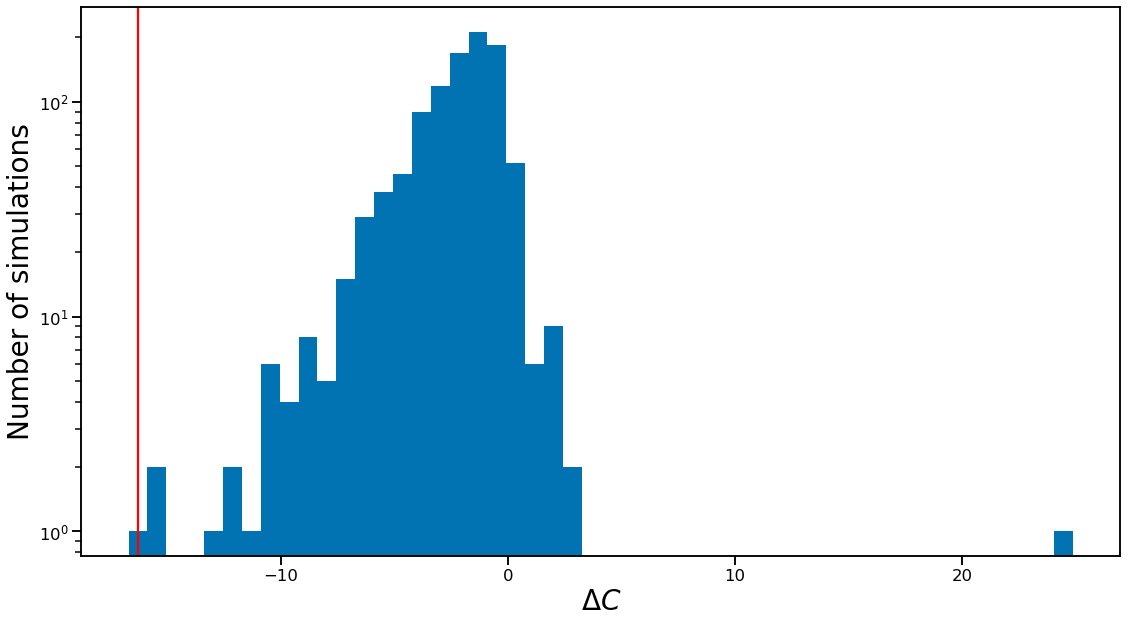

In [68]:
infile = root_dir + 'xmm/simultaneous_fitting/tbfeo_diskbb_simpl_diskbb_gabs_detlev_cstat.csv'
data = ascii.read(infile, format='csv', data_start=0, names=['n_sim', 'cstat0', 'cstat_new'])
# delta_chi0 = 984.46-967.28
delta_chi0 = 974.59-958.28
delta_chi = data['cstat0'] - data['cstat_new']

better_mask = delta_chi <= delta_chi0

print(np.sum(better_mask))
print(len(delta_chi))
print(np.sum(better_mask)/len(delta_chi))

plt.figure(figsize=(16,9))
plt.hist(-delta_chi, bins=50)
plt.axvline(-delta_chi0, color='red')
plt.xlabel(r'$\Delta C$', fontsize=28)
plt.ylabel('Number of simulations', fontsize=28)
plt.yscale('log')

plt.tight_layout()
plt.savefig(root_dir + 'figures/XMM_abs_detlev.pdf')